# sdata DoE

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%autosave 0
    
import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.WARNING, datefmt='%I:%M:%S')

import os
import sdata
import sdata.doe
print("sdata v{}".format(sdata.__version__))

Autosave disabled
sdata v0.19.0


Define ranges

In [2]:
params_ranges = {"a":[1,2],
"b":[10,20],
"c":[-1,1],
"d":[1,10]}

create DoE instance

In [3]:
doe = sdata.doe.DOE(params_ranges)
b = doe.ranges["b"]
b

[10.0 , 20.0]

In [4]:
doe.ranges

OrderedDict([('a', [1.0 , 2.0]),
             ('b', [10.0 , 20.0]),
             ('c', [-1.0 , 1.0]),
             ('d', [1.0 , 10.0])])

 generate DoE samples [0 .. 1] 

In [5]:
doe.gen_sobol01(n=3)

,a,b,c,d
doe_id,,,,
1,0.50,0.50,0.50,0.50
2,0.75,0.25,0.75,0.25
3,0.25,0.75,0.25,0.75


generate DoE samples [lower .. upper] 

In [6]:
doe.gen_sobol(n=3)

,a,b,c,d
doe_id,,,,
1,1.50,15.0,0.0,5.50
2,1.75,12.5,0.5,3.25
3,1.25,17.5,-0.5,7.75


plot doe samples

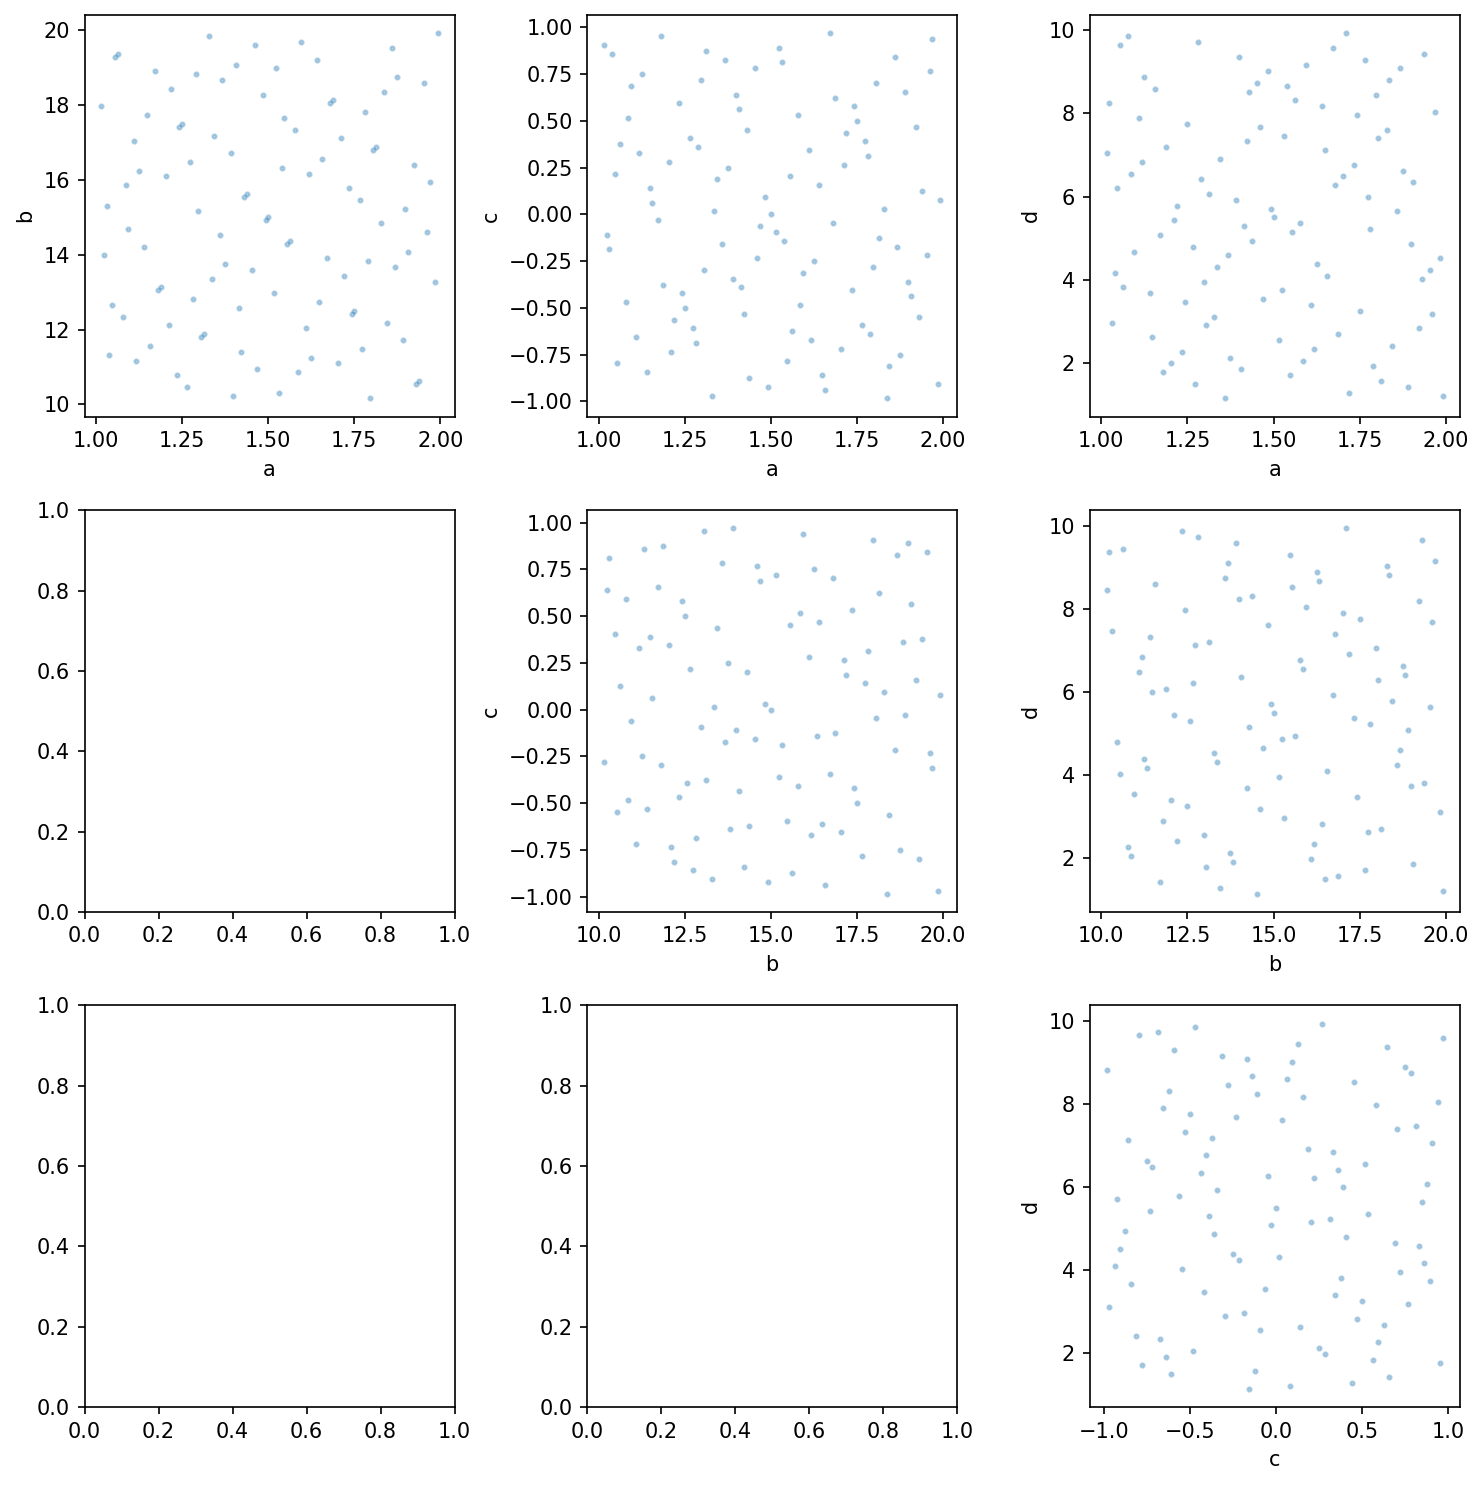

In [7]:
sdata.doe.plot_doe(doe.gen_sobol(n=100), s=4, figsize=(10,10), alpha=.3)

create sdata.Data instance

In [8]:
df_doe = doe.gen_sobol(n=3)
data = doe.to_data(name="test", df_doe=df_doe)
print(data)
data.metadata.udf

(Data 'test':730934b79b17424eafe924d7e31195e6)


,name,value,dtype,unit,description,label,required
key,,,,,,,
a,a,"[1.0 , 2.0]",str,?,parameter range a,$a$,False
b,b,"[10.0 , 20.0]",str,?,parameter range b,$b$,False
c,c,"[-1.0 , 1.0]",str,?,parameter range c,$c$,False
d,d,"[1.0 , 10.0]",str,?,parameter range d,$d$,False


In [9]:
data.df.head()

,a,b,c,d
doe_id,,,,
1,1.50,15.0,0.0,5.50
2,1.75,12.5,0.5,3.25
3,1.25,17.5,-0.5,7.75


export to csv

In [10]:
data.to_csv("/tmp/doe.csv")

import from csv

In [11]:
my_doe = sdata.Data.from_csv(filepath="/tmp/doe.csv")
my_doe.df

,a,b,c,d
doe_id,,,,
1,1.50,15.0,0.0,5.50
2,1.75,12.5,0.5,3.25
3,1.25,17.5,-0.5,7.75


export as xlsx

In [12]:
data.to_xlsx(filepath="/tmp/doe.xlsx")

import xlsx

In [13]:
my_doex = sdata.Data.from_xlsx(filepath="/tmp/doe.xlsx")
my_doex.df

,a,b,c,d
doe_id,,,,
1,1.50,15.0,0.0,5.50
2,1.75,12.5,0.5,3.25
3,1.25,17.5,-0.5,7.75
